# Common inputs

In [195]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import albumentations as A

# Reading the data

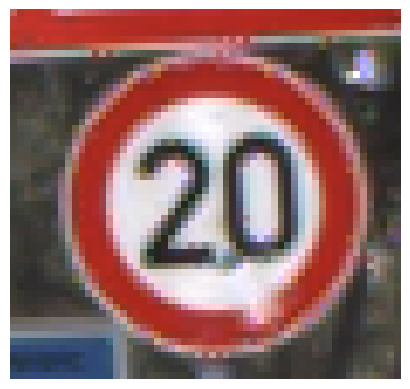

In [280]:
def read_and_display_images(image_path):
    # Read the image
    img = cv2.imread(image_path)

    # OpenCV reads images in BGR format, convert it to RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Display the image
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.show()
    return img_rgb


image_path = "./dataset/GTSRB/training/original/00000/00000_00020.ppm"
sign_image = read_and_display_images(image_path)

## Resizing the image so is compatible with all the transform

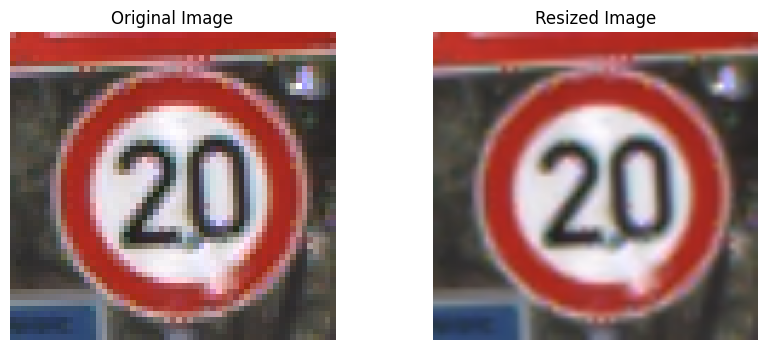

In [281]:
# Original image
original_image = sign_image

# Apply transformations for each combination of parameters
transform_image = A.Compose([
    A.SmallestMaxSize(p=1.0, max_size=128, interpolation=1)
])
transformed = transform_image(image=original_image)

# Display all transformed images
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(original_image)
plt.title(f"Original Image")
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(transformed['image'])
plt.title(f"Resized Image")
plt.axis('off')

plt.show()

Saving the resized image for future work

In [282]:
resized_image = transformed['image']

# Rain filter

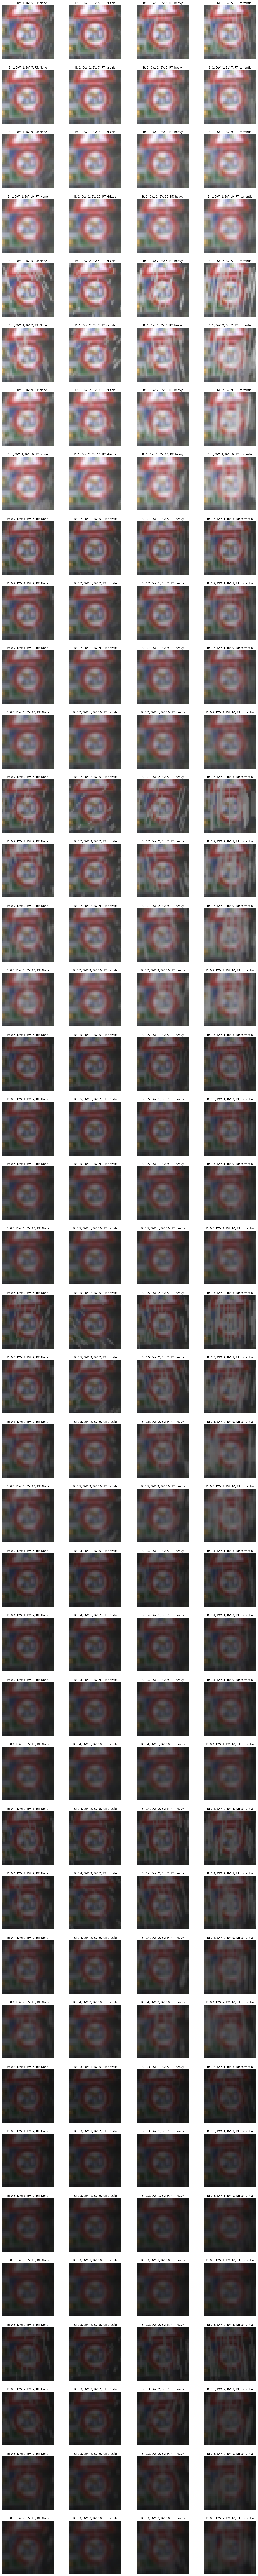

In [199]:
# List to store transformed images
transformed_images = []

# List of parameters
brightness_coefficients = [1, 0.7, 0.5, 0.4, 0.3]
drop_width_values = [1, 2]
blur_values = [5, 7, 9, 10]
rain_types = [None, 'drizzle', 'heavy', 'torrential']

# Original image
original_image = resized_image

# Apply transformations for each combination of parameters
for brightness_coefficient in brightness_coefficients:
    for drop_width in drop_width_values:
        for blur_value in blur_values:
            for rain_type in rain_types:
                transform_image = A.Compose([
                    A.RandomRain(brightness_coefficient=brightness_coefficient,
                                 drop_width=drop_width, blur_value=blur_value,
                                 p=1, rain_type=rain_type),
                    A.SmallestMaxSize(p=1.0, max_size=np.max([np.shape(sign_image)[0], np.shape(sign_image)[1]]),
                                      interpolation=1)
                ])
                transformed = transform_image(image=original_image)
                transformed_images.append(
                    (transformed['image'], brightness_coefficient, drop_width, blur_value, rain_type))

# Display all transformed images
plt.figure(figsize=(20, 5 * len(drop_width_values) * len(blur_values) * len(brightness_coefficients)))
num_images = len(transformed_images)
rows = num_images // 4 + (1 if num_images % 4 > 0 else 0)
for i, (image, brightness, drop_width, blur, rain_type) in enumerate(transformed_images):
    plt.subplot(rows, 4, i + 1)
    plt.imshow(image)
    plt.title(f"B: {brightness}, DW: {drop_width}, BV: {blur}, RT: {rain_type}")
    plt.axis('off')

plt.show()

# Spatter

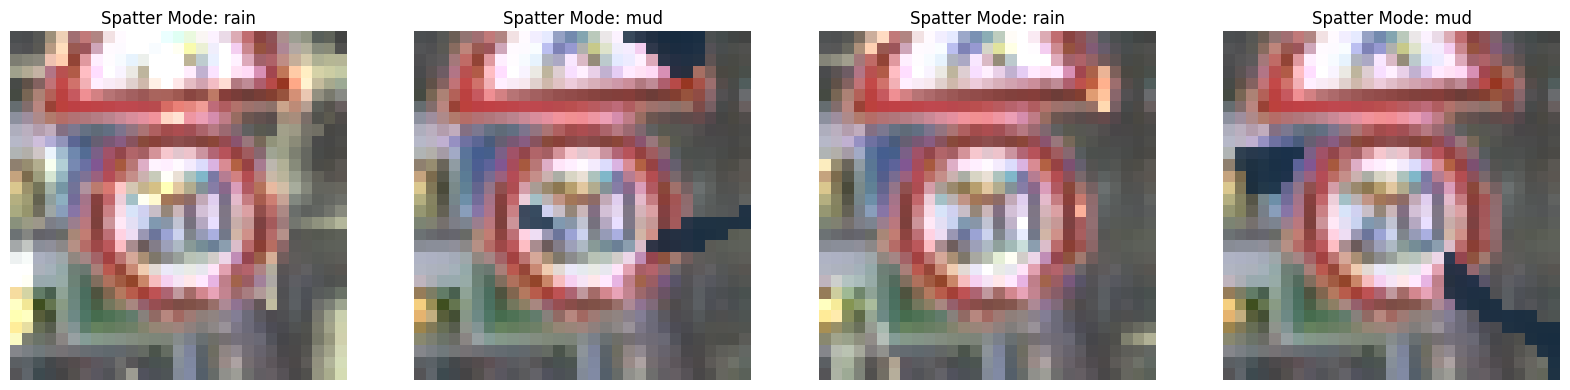

In [218]:
# List to store transformed images
transformed_images = []

# List of parameters
spatter_modes = ['rain', 'mud']

# Original image
original_image = sign_image

for spatter_mode in spatter_modes:
    # Apply transformations for each combination of parameters
    transform_image = A.Compose([
        A.Spatter(p=1.0, mode=spatter_mode)
    ])
    transformed = transform_image(image=original_image)
    transformed_images.append((transformed['image'], spatter_mode))
for spatter_mode in spatter_modes:
    # Apply transformations for each combination of parameters
    transform_image = A.Compose([
        A.Spatter(p=1.0, mode=spatter_mode)
    ])
    transformed = transform_image(image=original_image)
    transformed_images.append((transformed['image'], spatter_mode))

# Display all transformed images
plt.figure(figsize=(20, 5))
num_images = len(transformed_images)
for i, (image, spatter_mode) in enumerate(transformed_images):
    plt.subplot(1, 4, i + 1)
    plt.imshow(image)
    plt.title(f"Spatter Mode: {spatter_mode}")
    plt.axis('off')

plt.show()

## ZoomBlur

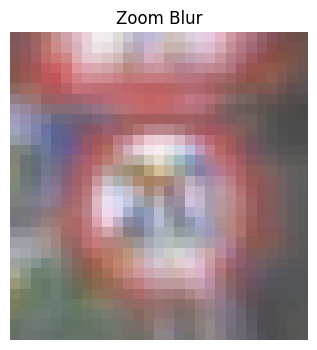

In [201]:
# List to store transformed images
transformed_images = []

# List of parameters
# zoom_blur

# Original image
original_image = sign_image

# Apply transformations for each combination of parameters
transform_image = A.Compose([
    A.ZoomBlur(p=1.0, max_factor=(1.4, 2), step_factor=(0.03, 0.03))
])
transformed = transform_image(image=original_image)
transformed_images.append((transformed['image']))

# Display all transformed images
plt.figure(figsize=(10, 4))
num_images = len(transformed_images)
for i, (image) in enumerate(transformed_images):
    plt.subplot(1, 2, i + 1)
    plt.imshow(image)
    plt.title(f"Zoom Blur")
    plt.axis('off')

plt.show()

## RandomSunFlare

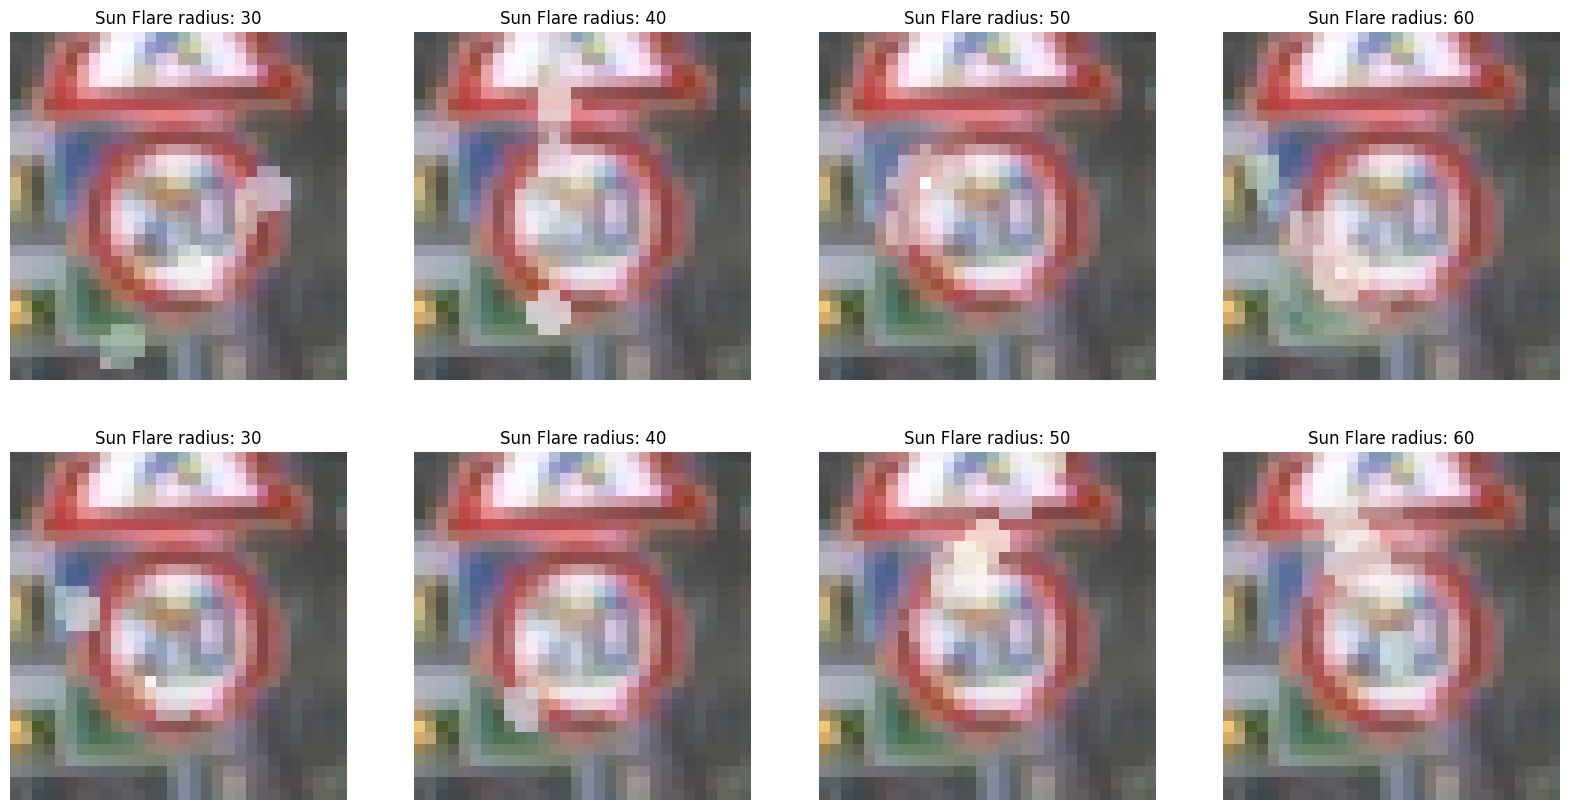

In [202]:
# List to store transformed images
transformed_images = []

# List of parameters
srcs_radius = [30, 40, 50, 60]

# Original image
original_image = resized_image

for src_radius in srcs_radius:
    # Apply transformations for each combination of parameters
    transform_image = A.Compose([
        A.RandomSunFlare(p=1.0, flare_roi=(0.3, 0.3, 0.7, 0.7), angle_lower=0, angle_upper=1, num_flare_circles_lower=6,
                         num_flare_circles_upper=10, src_radius=src_radius, src_color=(255, 255, 255)),
        A.SmallestMaxSize(p=1.0, max_size=np.max([np.shape(sign_image)[0], np.shape(sign_image)[1]]), interpolation=1)
    ])
    transformed = transform_image(image=original_image)
    transformed_images.append((transformed['image'], src_radius))
for src_radius in srcs_radius:
    # Apply transformations for each combination of parameters
    transform_image = A.Compose([
        A.RandomSunFlare(p=1.0, flare_roi=(0.3, 0.3, 0.7, 0.7), angle_lower=0, angle_upper=1, num_flare_circles_lower=6,
                         num_flare_circles_upper=10, src_radius=src_radius, src_color=(255, 255, 255)),
        A.SmallestMaxSize(p=1.0, max_size=np.max([np.shape(sign_image)[0], np.shape(sign_image)[1]]), interpolation=1)
    ])
    transformed = transform_image(image=original_image)
    transformed_images.append((transformed['image'], src_radius))

# Display all transformed images
plt.figure(figsize=(20, 10))
num_images = len(transformed_images)
for i, (image, spatter_mode) in enumerate(transformed_images):
    plt.subplot(2, 4, i + 1)
    plt.imshow(image)
    plt.title(f"Sun Flare radius: {spatter_mode}")
    plt.axis('off')

plt.show()

## Ringing Overshoot (out of focus effect)

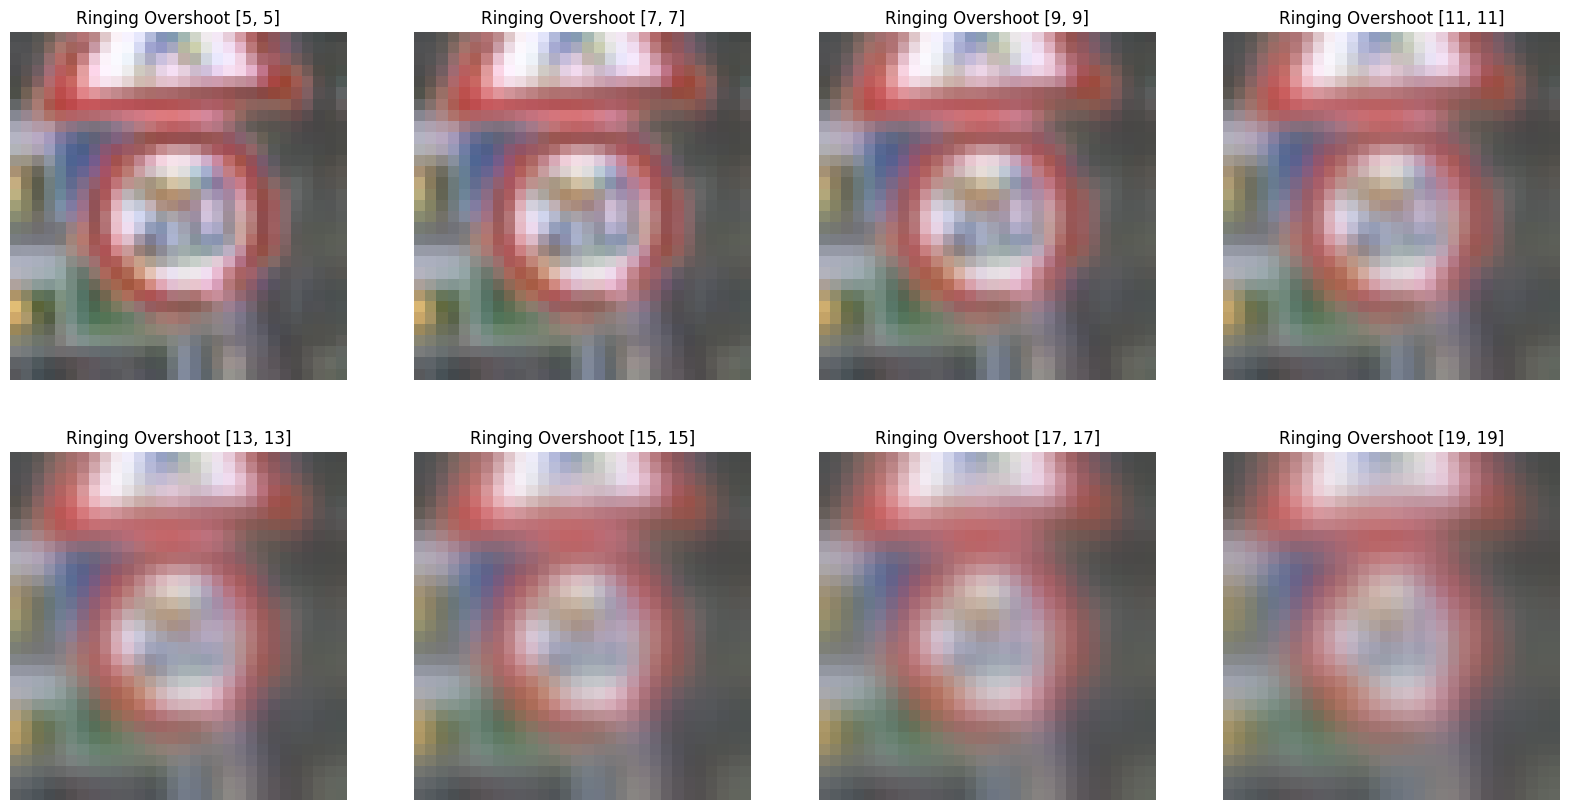

In [203]:
# List to store transformed images
transformed_images = []

# List of parameters
blur_limits = [[5, 5], [7, 7], [9, 9], [11, 11], [13, 13], [15, 15], [17, 17], [19, 19]]

# Original image
original_image = resized_image

# for src_radius in srcs_radius:
# Apply transformations for each combination of parameters
for blur_limit in blur_limits:
    transform_image = A.Compose([
        A.RingingOvershoot(p=1.0, blur_limit=blur_limit, cutoff=(0.1, 0.2)),
        A.SmallestMaxSize(p=1.0, max_size=np.max([np.shape(sign_image)[0], np.shape(sign_image)[1]]), interpolation=1)
    ])
    transformed = transform_image(image=original_image)
    transformed_images.append((transformed['image'], blur_limit))

# Display all transformed images
plt.figure(figsize=(20, 10))
num_images = len(transformed_images)
for i, (image, bl) in enumerate(transformed_images):
    plt.subplot(2, 4, i + 1)
    plt.imshow(image)
    plt.title(f"Ringing Overshoot {bl}")
    plt.axis('off')

plt.show()

## Perspective

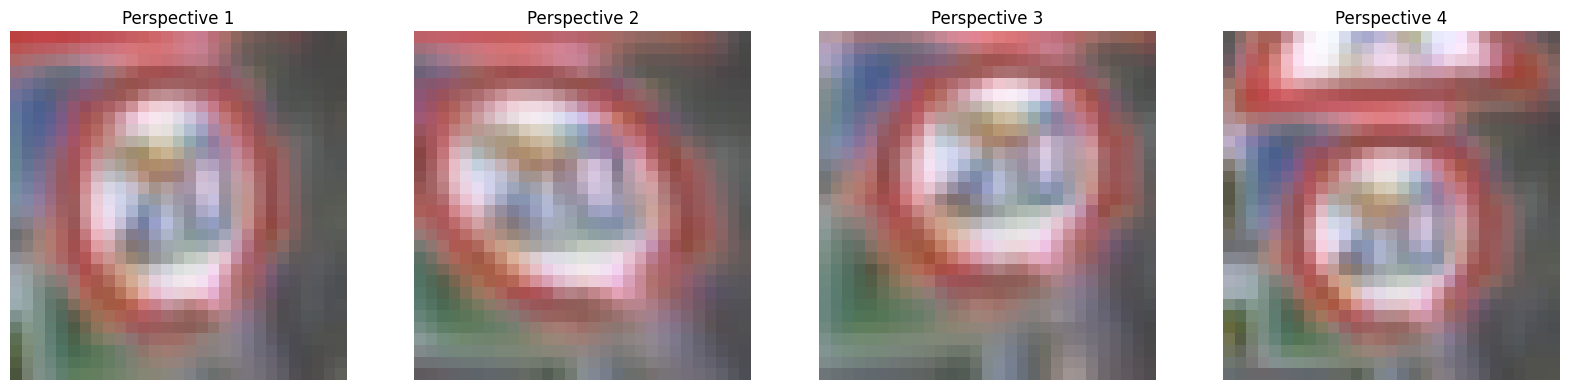

In [210]:
# List to store transformed images
transformed_images = []

# List of parameters
iterations = [1, 2, 3, 4]

# Original image
original_image = sign_image

# Apply transformations for each combination of parameters
for i in iterations:
    transform_image = A.Compose([
        A.Perspective(p=1.0, scale=(0.15, 0.2), keep_size=True, pad_mode=1, mask_pad_val=0, fit_output=False,
                      interpolation=1)
    ])
    transformed = transform_image(image=original_image)
    transformed_images.append((transformed['image'], i))

# Display all transformed images
plt.figure(figsize=(20, 5))
num_images = len(transformed_images)
for i, (image, itr) in enumerate(transformed_images):
    plt.subplot(1, 4, i + 1)
    plt.imshow(image)
    plt.title(f"Perspective {itr}")
    plt.axis('off')

plt.show()

## Motion Blur

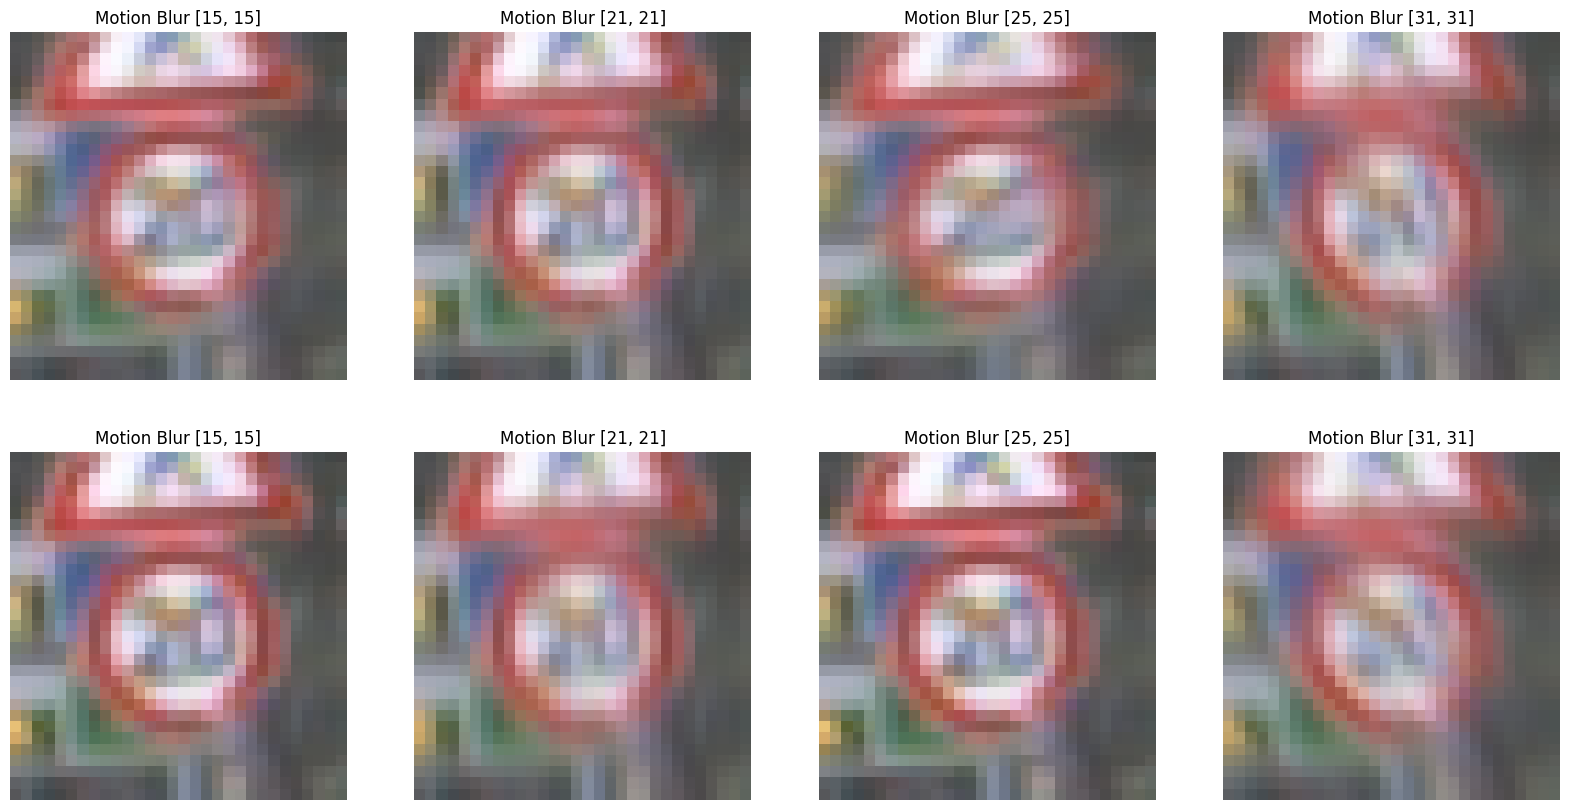

In [212]:
# List to store transformed images
transformed_images = []

# List of parameters
blur_limits = [[15, 15], [21, 21], [25, 25], [31, 31]]

# Original image
original_image = resized_image

# for src_radius in srcs_radius:
# Apply transformations for each combination of parameters
for blur_limit in blur_limits:
    transform_image = A.Compose([
        A.MotionBlur(p=1, blur_limit=blur_limit, allow_shifted=False),
        A.SmallestMaxSize(p=1.0, max_size=np.max([np.shape(sign_image)[0], np.shape(sign_image)[1]]), interpolation=1)
    ])
    transformed = transform_image(image=original_image)
    transformed_images.append((transformed['image'], blur_limit))
for blur_limit in blur_limits:
    transform_image = A.Compose([
        A.MotionBlur(p=1, blur_limit=blur_limit, allow_shifted=False),
        A.SmallestMaxSize(p=1.0, max_size=np.max([np.shape(sign_image)[0], np.shape(sign_image)[1]]), interpolation=1)
    ])
    transformed = transform_image(image=original_image)
    transformed_images.append((transformed['image'], blur_limit))

# Display all transformed images
plt.figure(figsize=(20, 10))
num_images = len(transformed_images)
for i, (image, bl) in enumerate(transformed_images):
    plt.subplot(2, 4, i + 1)
    plt.imshow(image)
    plt.title(f"Motion Blur {bl}")
    plt.axis('off')

plt.show()

# Fog

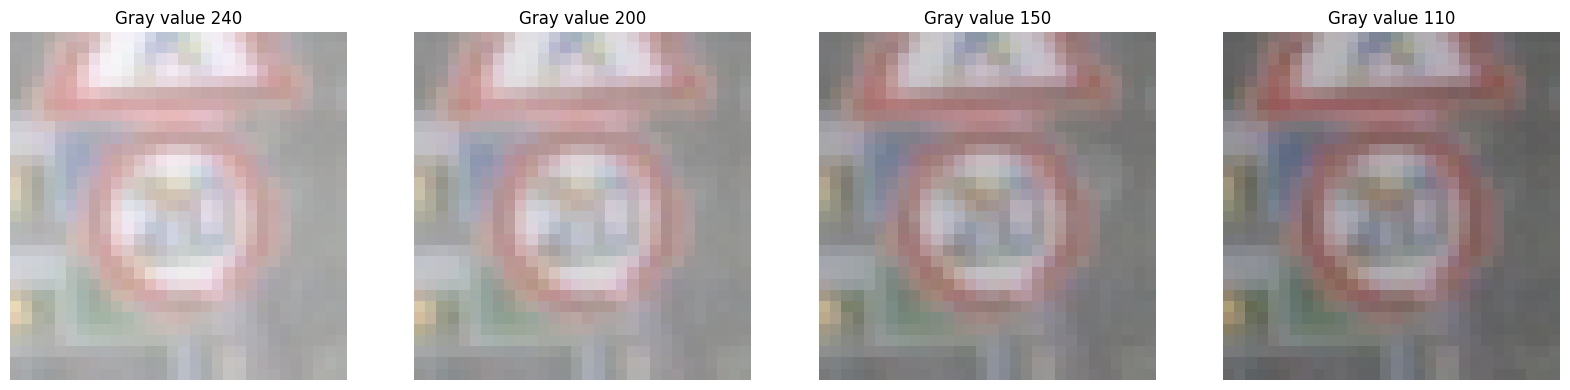

In [215]:
# List of grays intensity
gray_values = [240, 200, 150, 110]

# List to store transformed images
transformed_images = []

# Original image
original_image = resized_image

for gray_value in gray_values:
    # Apply transformations for each combination of parameters
    gray_image = np.full((np.shape(original_image)[0], np.shape(original_image)[1], 3), gray_value, dtype=np.uint8)
    transform_image = A.Compose([
        A.RandomFog(fog_coef_lower=0.2, fog_coef_upper=0.6, alpha_coef=0.2, p=1),
        A.GaussianBlur(blur_limits=(2, 15), p=1),
        A.TemplateTransform(p=1, templates=gray_image),
        A.ISONoise(intensity=(0.2, 0.5), p=1),
        A.SmallestMaxSize(p=1.0, max_size=np.max([np.shape(sign_image)[0], np.shape(sign_image)[1]]), interpolation=1)
    ])
    transformed = transform_image(image=original_image)
    transformed_images.append((transformed['image'], gray_value))

# Display all transformed images
plt.figure(figsize=(20, 5))
num_images = len(transformed_images)
for i, (image, gv) in enumerate(transformed_images):
    plt.subplot(1, 4, i + 1)
    plt.imshow(image)
    plt.title(f"Gray value {gv}")
    plt.axis('off')

plt.show()

## Noise

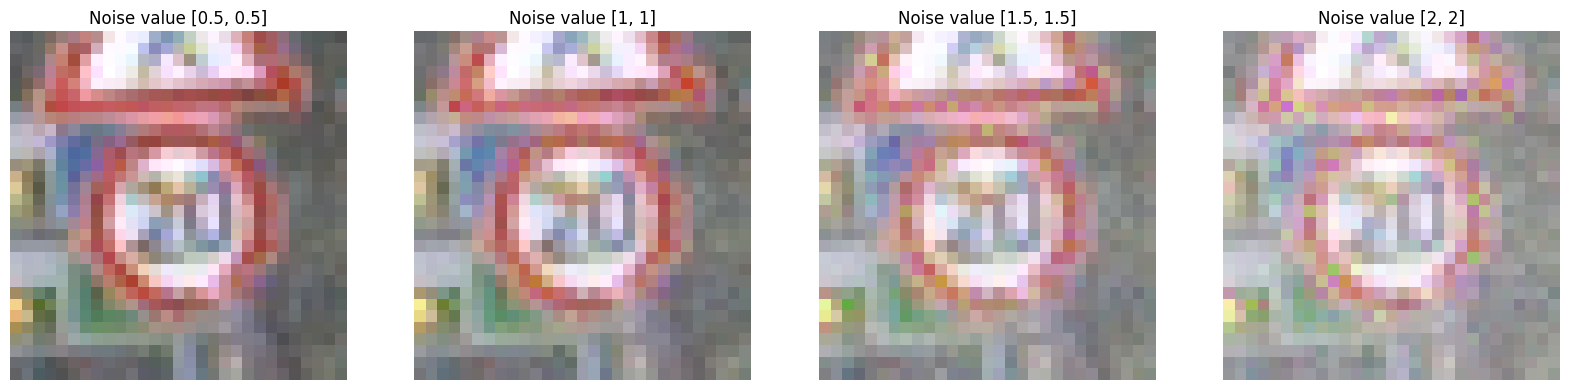

In [249]:
# List of grays intensity
noise_values = [[0.5, 0.5], [1, 1], [1.5, 1.5], [2, 2]]

# List to store transformed images
transformed_images = []

# Original image
original_image = sign_image

for noise_value in noise_values:
    # Apply transformations for each combination of parameters
    transform_image = A.Compose([
        A.ISONoise(intensity=noise_value, p=1)
    ])
    transformed = transform_image(image=original_image)
    transformed_images.append((transformed['image'], noise_value))

# Display all transformed images
plt.figure(figsize=(20, 5))
num_images = len(transformed_images)
for i, (image, nv) in enumerate(transformed_images):
    plt.subplot(1, 4, i + 1)
    plt.imshow(image)
    plt.title(f"Noise value {nv}")
    plt.axis('off')

plt.show()

## Random Gamma

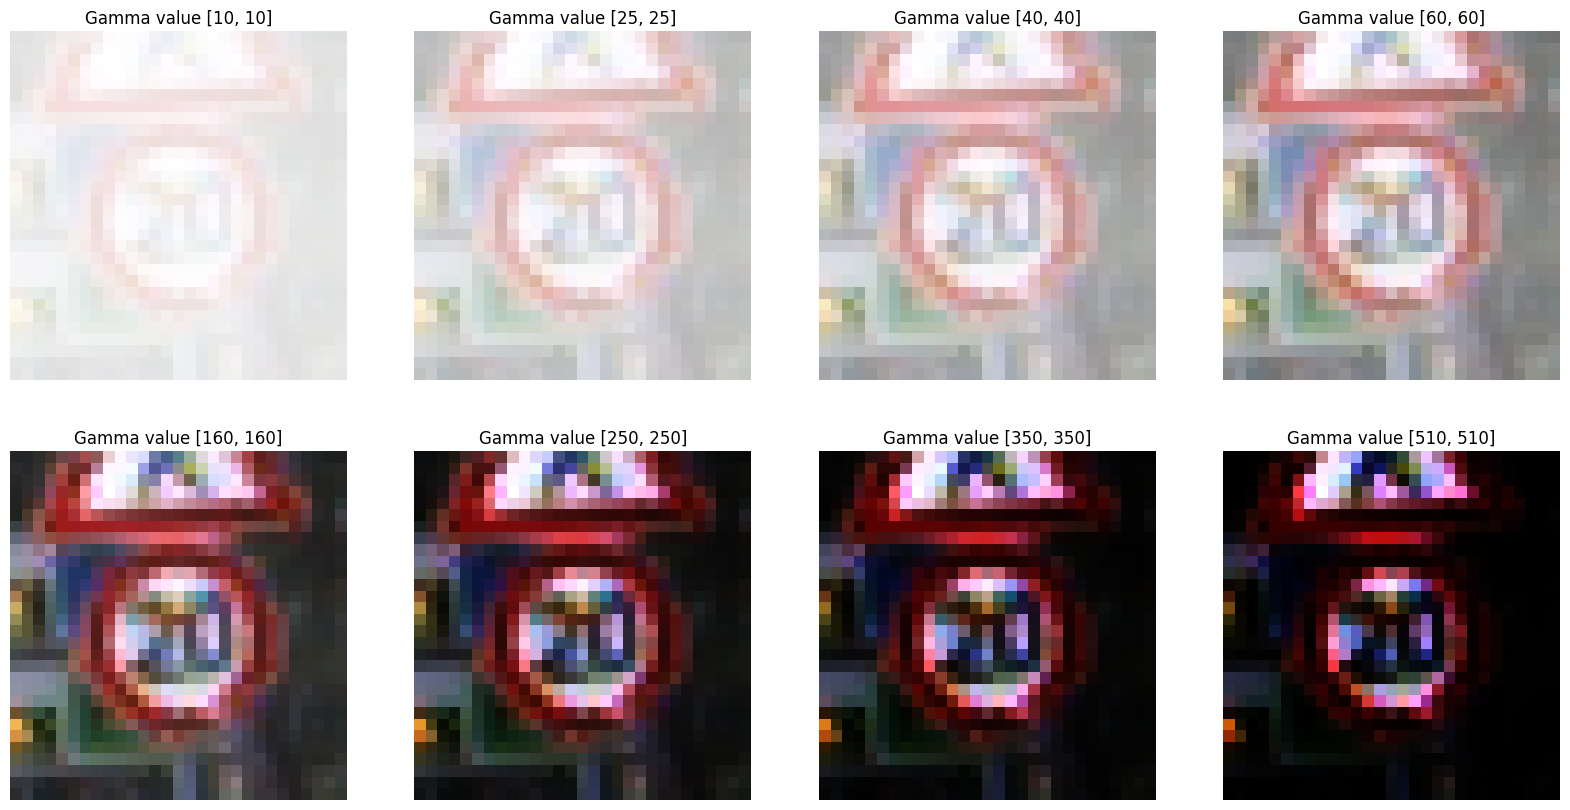

In [273]:
# List of grays intensity
gamma_values = [[10, 10], [25, 25], [40, 40], [60, 60], [160, 160], [250, 250], [350, 350], [510, 510]]

# List to store transformed images
transformed_images = []

# Original image
original_image = sign_image

for gamma_value in gamma_values:
    # Apply transformations for each combination of parameters
    transform_image = A.Compose([
        A.RandomGamma(gamma_limit=gamma_value, p=1)
    ])
    transformed = transform_image(image=original_image)
    transformed_images.append((transformed['image'], gamma_value))

# Display all transformed images
plt.figure(figsize=(20, 10))
num_images = len(transformed_images)
for i, (image, gv) in enumerate(transformed_images):
    plt.subplot(2, 4, i + 1)
    plt.imshow(image)
    plt.title(f"Gamma value {gv}")
    plt.axis('off')

plt.show()

## Shadow

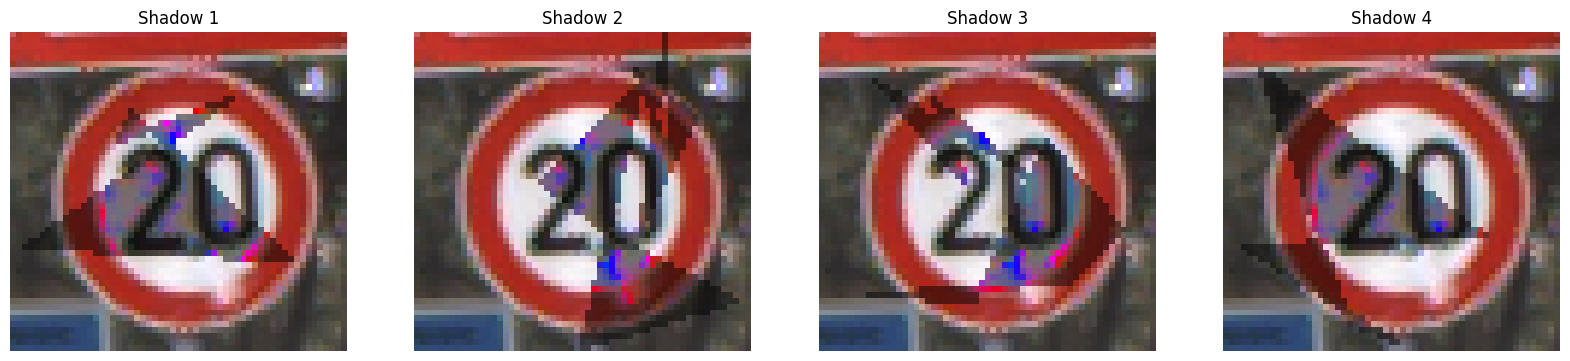

In [284]:
# List of grays intensity
noise_values = [1,2,3,4]

# List to store transformed images
transformed_images = []

# Original image
original_image = sign_image

for noise_value in noise_values:
    transform_image = A.Compose([
        A.RandomShadow(shadow_roi=(0, 0, 1, 1), num_shadows_limit=(1, 2), num_shadows_lower=None,
                       num_shadows_upper=None, shadow_dimension=5, always_apply=False, p=1)
    ])
    transformed = transform_image(image=original_image)
    transformed_images.append((transformed['image'], noise_value))

# Display all transformed images
plt.figure(figsize=(20, 5))
num_images = len(transformed_images)
for i, (image, nv) in enumerate(transformed_images):
    plt.subplot(1, 4, i + 1)
    plt.imshow(image)
    plt.title(f"Shadow {nv}")
    plt.axis('off')

plt.show()

In [1]:
from data_augmenter import DataAugmenter
da = DataAugmenter("dataset/GTSRB/training")
da.load_images()

00002_00012.ppm
00010_00011.ppm
00012_00027.ppm
00006_00015.ppm
00006_00013.ppm
00007_00029.ppm
00012_00011.ppm
00012_00008.ppm
00004_00002.ppm
00009_00018.ppm
00008_00023.ppm
00012_00003.ppm
00002_00004.ppm
00010_00019.ppm
00008_00012.ppm
00010_00021.ppm
00009_00007.ppm
00005_00003.ppm
00009_00019.ppm
00010_00006.ppm
00010_00005.ppm
00008_00021.ppm
00006_00028.ppm
00001_00028.ppm
00005_00024.ppm
00008_00014.ppm
00008_00001.ppm
00001_00011.ppm
00005_00007.ppm
00003_00015.ppm
00010_00007.ppm
00011_00002.ppm
00000_00024.ppm
00003_00003.ppm
00006_00019.ppm
00008_00003.ppm
00004_00018.ppm
00007_00015.ppm
00004_00009.ppm
00008_00026.ppm
00002_00005.ppm
00012_00015.ppm
00000_00029.ppm
00010_00000.ppm
00011_00012.ppm
00000_00001.ppm
00001_00003.ppm
00011_00024.ppm
00000_00019.ppm
00012_00017.ppm
00003_00010.ppm
00013_00028.ppm
00008_00015.ppm
00004_00001.ppm
00000_00021.ppm
00011_00003.ppm
00013_00020.ppm
00001_00022.ppm
00010_00020.ppm
00005_00015.ppm
00001_00013.ppm
00009_00001.ppm
00012_00